In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
nat_change = pd.read_csv("data/lifeanddeath.csv",sep=";",decimal=",",encoding="utf8")

In [3]:
nat_change["Buurten"] = nat_change["Buurten"].str.split()

In [4]:
nat_change["Buurtcode"] = [item[0] for item in nat_change["Buurten"]]

In [5]:
nat_change = nat_change.set_index("Buurtcode").drop(index="Onbekend", columns="Buurten").rename(columns={'Natuurlijk verloop|1996':'1996', 'Natuurlijk verloop|1997':'1997',
       'Natuurlijk verloop|1998':'1998', 'Natuurlijk verloop|1999':'1999',
       'Natuurlijk verloop|2000':'2000', 'Natuurlijk verloop|2001':'2001',
       'Natuurlijk verloop|2002':'2002', 'Natuurlijk verloop|2003':'2003',
       'Natuurlijk verloop|2004':'2004', 'Natuurlijk verloop|2005':'2005',
       'Natuurlijk verloop|2006':'2006', 'Natuurlijk verloop|2007':'2007',
       'Natuurlijk verloop|2008':'2008', 'Natuurlijk verloop|2009':'2009',
       'Natuurlijk verloop|2010':'2010', 'Natuurlijk verloop|2011':'2011',
       'Natuurlijk verloop|2012':'2012', 'Natuurlijk verloop|2013':'2013',
       'Natuurlijk verloop|2014':'2014', 'Natuurlijk verloop|2015':'2015',
       'Natuurlijk verloop|2016':'2016', 'Natuurlijk verloop|2017':'2017',
       'Natuurlijk verloop|2018':'2018'}).replace('-',0).fillna(0)

In [6]:
nat_change = nat_change.astype(float)

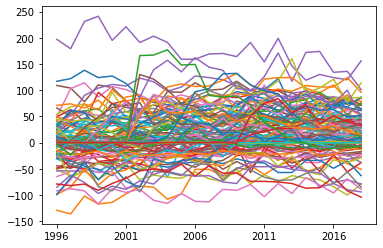

In [7]:
for i in nat_change.index:
    nat_change.loc[i].plot()

In [8]:
def calc_2020 (row):
    x = nat_change.columns.astype(float)
    y =  nat_change.loc[row]
    model = np.polyfit(x, y, 1)
    predict = np.poly1d(model)
    return predict(2020)

In [9]:
nat_change["2020"] = 0

In [10]:
for row in nat_change.index:
    nat_change["2020"].loc[row] = calc_2020(row)

C:\Users\joche\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
natural_change = round(nat_change["2020"],1)

In [12]:
natural_change.to_csv("output/natural_change.csv")

In [19]:
nat_change

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020
Buurtcode,,,,,,,,,,,,,,,,,,,,,
01,3.0,-1.0,-1.0,-11.0,3.0,-22.0,-13.0,9.0,-8.0,7.0,...,-4.0,11.0,1.0,16.0,12.0,16.0,4.0,7.0,18.0,10.531429
02,-21.0,-33.0,-27.0,-27.0,-28.0,-39.0,-22.0,-28.0,-19.0,-14.0,...,-30.0,-18.0,-34.0,-16.0,-10.0,-11.0,-16.0,-39.0,-22.0,-14.537143
03,-7.0,-4.0,28.0,-12.0,-5.0,-10.0,17.0,19.0,29.0,15.0,...,23.0,22.0,40.0,45.0,25.0,20.0,32.0,3.0,28.0,30.539592
04,-23.0,-32.0,-18.0,-23.0,-35.0,-19.0,-22.0,-31.0,-9.0,-23.0,...,-5.0,12.0,-5.0,-4.0,-10.0,0.0,-6.0,-11.0,3.0,2.253061
05,-21.0,-28.0,-19.0,-13.0,-18.0,-24.0,-21.0,-24.0,-24.0,-10.0,...,-17.0,-26.0,-31.0,-31.0,-22.0,-35.0,-28.0,-32.0,-27.0,-24.062857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.137959
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,49.0,...,110.0,99.0,93.0,64.0,70.0,62.0,63.0,49.0,52.0,88.798367
119,0.0,0.0,0.0,0.0,0.0,0.0,53.0,83.0,57.0,57.0,...,51.0,51.0,41.0,29.0,27.0,26.0,32.0,21.0,15.0,37.121633


,Buurtcode,variable,value
0,01,1996,3.000000
1,02,1996,-21.000000
2,03,1996,-7.000000
3,04,1996,-23.000000
4,05,1996,-21.000000
...,...,...,...
2731,117,2020,-0.137959
2732,118,2020,88.798367
2733,119,2020,37.121633
2734,120,2020,19.726531


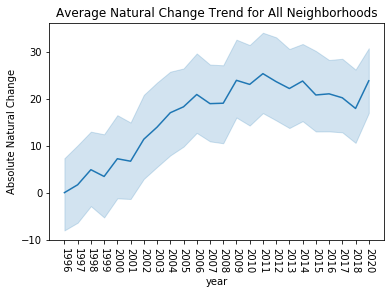

In [26]:
#plt.plot(nat_change.loc["01"])
sns.lineplot(x="variable",y="value",data=nat_change.reset_index().melt(id_vars="Buurtcode"))
plt.xticks(rotation=-90)
plt.title("Average Natural Change Trend for All Neighborhoods")
plt.xlabel("year")
plt.ylabel("Absolute Natural Change")
plt.show()